# COMP 4151 - Assignment 5

## Due: 10/29/2019 at 11:59PM

## Name:

**Note**: 

- All work in this assignment must be done, created, originated from each student. 
- All external assistance must be explicitly mentioned and cited. 
- Using work done by others without explicit citation is considered cheating. 
- A student will receive a zero grade on the assignment for cheating. 
- Repeated offence will lead to additional consequences.

This assignment focuses on the first phase of the project.  The dataset can be obtained here: https://umdrive.memphis.edu/vphan/public/4151/BCHI-dataset_2019-03-04.csv

Give comprehensive answers to these questions, as much as, possible.  When you answer a question, your answer should be in English. At the same time, if applicable, the answer should consist Python code that shows how you obtain your answer.  People should be able to read and understand your answer without guessing on your behalf how to get the answer.



In [1]:
import pandas as pd
import seaborn as sns

In [2]:
bchi = pd.read_csv('https://umdrive.memphis.edu/vphan/public/4151/BCHI-dataset_2019-03-04.csv')

1. What is the Indicator attribute?

**Indicator** attribute is essentially the defining factors of the of the broad Indicator Categories, which include health, socio-economic, and demographic among others, of a parrticula city for some particular time period and subsection of the city population.

2. How many categories of Indicator are there?

In [3]:
print('Total number of Indicator categories are:', len(bchi['Indicator Category'].unique()))
print('Total number of Factors for the Indicator categories are:', len(bchi['Indicator'].unique()))

Total number of Indicator categories are: 13
Total number of Factors for the Indicator categories are: 61


3. Explain the "Value" value of row 26382 in this dataset.

In [4]:
bchi.loc[26382]

Indicator Category                                 Maternal and Child Health
Indicator                      Infant Mortality Rate (Per 1,000 live births)
Year                                                                    2010
Sex                                                                     Both
Race/Ethnicity                                                      Asian/PI
Value                                                                      2
Place                                                             Denver, CO
BCHC Requested Methodology              Infant deaths per 1,000 live births.
Source                                                         Vital Records
Methods                                                                  NaN
Notes                                                                    NaN
90% Confidence Level - Low                                               NaN
90% Confidence Level - High                                              NaN

The **Value** attribute in this row indicates that the Infant Mortality rate for the year 2010 in Denver, Colorado, was 2 deaths per 1,000 liver births amongst those of Asian/Pacific Islander ethnicity.

4. Explain the "Value" value of row 7833.

In [5]:
bchi.loc[7833]

Indicator Category                                               Chronic Disease
Indicator                      Percent of Adults Who Meet CDC-Recommended Phy...
Year                                                                        2011
Sex                                                                         Both
Race/Ethnicity                                                          Hispanic
Value                                                                       44.2
Place                                               Oakland (Alameda County), CA
BCHC Requested Methodology     BRFSS (or similar survey). Percent of populati...
Source                                                          CHIS- 2005, 2009
Methods                        Adults 18+ years, Moderate physical activity a...
Notes                                                                        NaN
90% Confidence Level - Low                                                   NaN
90% Confidence Level - High 

This **Value** is a percentage of the adult population (18+ years) of Hispanic ethnicity in Oakland (Alameda County), California, that met the CDC's recommended physical activity levels in 2011. The value is 44.2%.

5. Explain the "Value" value of row 10682.  What does it mean that the "Sex" value is "Both"?

In [6]:
bchi.loc[10682]

Indicator Category                                                  Demographics
Indicator                                Percent of Population with a Disability
Year                                                                        2016
Sex                                                                         Both
Race/Ethnicity                                                          Hispanic
Value                                                                        8.9
Place                                                            Los Angeles, CA
BCHC Requested Methodology     Percentage of the population with a disability...
Source                         US Census Bureau, American Community Survey 1-...
Methods                                                                      NaN
Notes                                                                        NaN
90% Confidence Level - Low                                                   NaN
90% Confidence Level - High 

This **Value** is also a percentage. Its the proportion of the Hispanic population in Los Angeles, California, that had a disablity in 2016 according to the US Census Bureau. The value is 8.9%. The **Sex** attribute in this case is both, indicating that both males and females are included as a whole while calculating this value.

6. Explain the "Value" value of row 26701.

In [7]:
bchi.loc[26701]

Indicator Category                                     Maternal and Child Health
Indicator                          Infant Mortality Rate (Per 1,000 live births)
Year                                                                        2012
Sex                                                                         Both
Race/Ethnicity                                                             White
Value                                                                          5
Place                                                            San Antonio, TX
BCHC Requested Methodology                  Infant deaths per 1,000 live births.
Source                         Bexar County resident, SA Metro Health Birth a...
Methods                                                                      NaN
Notes                                                     Bexar County Residents
90% Confidence Level - Low                                                   NaN
90% Confidence Level - High 

The Value attribute in this row indicates that the Infant Mortality rate for the year 2012 in San Antonio, Texas, is 5 deaths per 1,000 liver births amongst those of Caucasian ethnicity. The **Notes** indicate that this encompasses the entire Bexar County, not just San Antonio.

7. Specifically, which factors does the indicator category 'Social and Economic Factors' consist of?

In [8]:
A = set(bchi.loc[bchi['Indicator Category'] == 'Social and Economic Factors'].Indicator.unique())

print('The Social and Economic Factors are:', A)

The Social and Economic Factors are: {'Percent of Households Whose Housing Costs Exceed 35% of Income', 'Percent of Children Living in Poverty', 'Percent of Population Uninsured', 'Percent Unemployed', 'Median Household Income (Dollars)', 'Percent Living Below 200% Poverty Level', 'Percent of 3 and 4 Year Olds Currently Enrolled in Preschool', 'Percent of High School Graduates (Over Age 18)'}


8. Visualize (e.g. with seaborn) the suicide rate of some specific race in the 3 most populous and 3 least populous cities over the period of the seven years. Explain in English each step, and show your Python code of each step.

In [17]:
df = bchi

We only have statistics for 2012 through 2016 for population. Therefore we'll just use 2016's value to sort the cities instead of selecting the cities differently every year (the results would probalby be about the same anyways). 

In [10]:
df.loc[df['Indicator'] == 'Total Population (People)']['Year'].unique()

array([2012, 2013, 2014, 2015, 2016], dtype=int64)

Our 7 year span will be from 2010 to 2016 as that is the data we have.

In [11]:
years = df.loc[df['Indicator'] == 'Suicide Rate (Age-Adjusted; Per 100,000 people)']['Year'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

We select all the suicide rates then join in the population values of the cities.

In [12]:
race = "White" # you can set this to whatever you want

suicide_rates = df.loc[(df['Indicator'] == 'Suicide Rate (Age-Adjusted; Per 100,000 people)') &
              (df['Race/Ethnicity'] == race)]
populations = df.loc[(df['Indicator'] == 'Total Population (People)') & (df['Place'] != 'U.S. Total, U.S. Total') 
                     & (df['Year'] == 2016)]
# Join population values onto suicide rates
rates = suicide_rates.set_index('Place').join(populations[['Place', 'Value']].set_index('Place'), rsuffix='_Population')

We then find the mean of the suicide rate for the three greatest and the three least populous cities each year

In [13]:
high_pop_rates, low_pop_rates = [], []
for year in years:
    # Select the three greatest and least cities with respect to population 
    # might change for years where statistics are missing
    sorted_rates = rates.loc[rates['Year'] == year].sort_values(by='Value_Population')
    greatest, least = sorted_rates[:-4:-1], sorted_rates[:3]
    high_pop_rates.append(greatest['Value'].mean())
    low_pop_rates.append(least['Value'].mean())

We convert it to a form we can easily plot

In [14]:
data = pd.DataFrame()
data['Mean Suicide Rate (Percent)'] = high_pop_rates + low_pop_rates
data['Population'] = ['3 Highest Population Cities'] * 7 + ['3 Lowest Population Cities'] * 7
data['Year'] = list(years) + list(years)
data

,Mean Suicide Rate (Percent),Population,Year
0,11.033333,3 Highest Population Cities,2010
1,9.566667,3 Highest Population Cities,2011
2,10.633333,3 Highest Population Cities,2012
3,14.100000,3 Highest Population Cities,2013
4,14.466667,3 Highest Population Cities,2014
5,14.433333,3 Highest Population Cities,2015
6,14.033333,3 Highest Population Cities,2016
7,12.700000,3 Lowest Population Cities,2010
8,15.600000,3 Lowest Population Cities,2011
9,12.933333,3 Lowest Population Cities,2012


Finally, make lineplot...

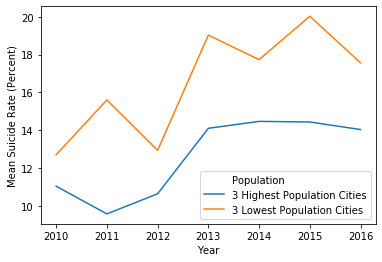

In [15]:
sns.lineplot(x='Year', y='Mean Suicide Rate (Percent)', hue='Population', data=data)

and a barplot.

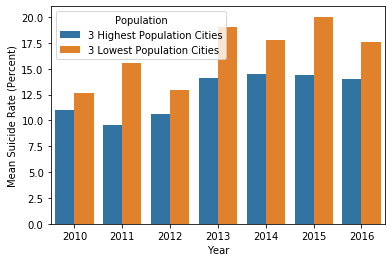

In [16]:
sns.barplot(x='Year', y='Mean Suicide Rate (Percent)', hue='Population', data=data)